In [1]:
from HW1.gradient_descent import gradient_descent, linear_step_chooser
from HW1.one_demensional import dichotomy, golden, fib
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
def rosenbrock_f(arg):
    x = arg[0]
    y = arg[1]
    return 100 * ((y - x ** 2) ** 2) + ((1. - x) ** 2)

In [3]:
def rosenbrock_grad(arg):
    x = arg[0]
    y = arg[1]
    dx = 400 * (x * (0.005 - y) + x ** 3 - 0.005)
    dy = 200 * (y - x ** 2)
    return np.array([dx, dy])

In [4]:
def draw_function(f, f_grad, start, method, show_trace_maker, x_min, x_max, x_step, y_min, y_max, y_step):
    trace = gradient_descent(f, f_grad, start, linear_step_chooser(method), stop_criterion='grad', eps=1e-8)
    print('Answer =', trace[-1])
    print(len(trace), 'steps')
    trace_to_show = show_trace_maker(trace)
    
    x_s = np.arange(x_min, x_max, x_step)
    y_s = np.arange(y_min, y_max, y_step)
    z_s = np.array([[f([x, y]) for x in x_s] for y in y_s])
    
    plt.figure()
    cs = plt.contour(x_s, y_s, z_s, levels=1000)
    # plt.clabel(cs)
    for i in tqdm(range(len(trace_to_show) - 1)):
        cur_point = trace_to_show[i]
        next_point = trace_to_show[i + 1]
        plt.scatter([cur_point[0]], [cur_point[1]])
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]])
    plt.grid()
    plt.show()

Answer = [0.99999999 0.99999998]
52302 steps


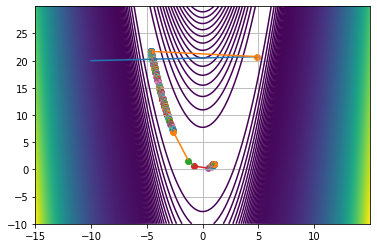

In [5]:
draw_function(rosenbrock_f,
              rosenbrock_grad,
              start=np.array([-10, 20]),
              method=golden,
              show_trace_maker=lambda trace: [trace[i] for i in range(len(trace)) if i % 100 == 0 or i < 10],
              x_min=-15,
              x_max=15,
              x_step=0.01,
              y_min=-10,
              y_max=30,
              y_step=0.01,
             )